# Linear Models
Ciencia De Datos
Jhon Edison Muñoz Burgos - A01793659


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [ ]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [ ]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

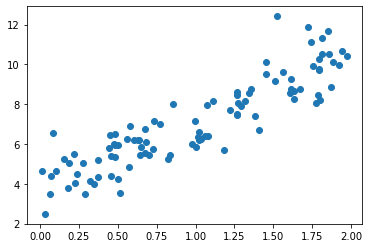

In [ ]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

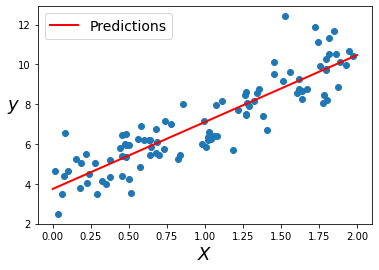

In [ ]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new.shape

(2, 1)

In [ ]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

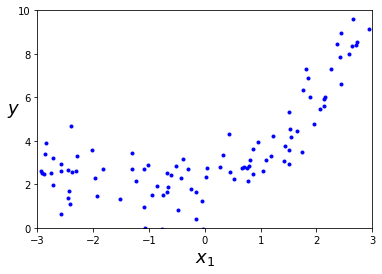

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [ ]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

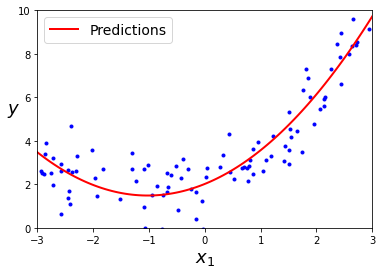

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

Se importa la base de Datos sobre el costo de Manufactura

In [ ]:
def Ecuacion(model):
    return [model.coef_, model.intercept_]

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [ ]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [ ]:
len(X)

1000

In [ ]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

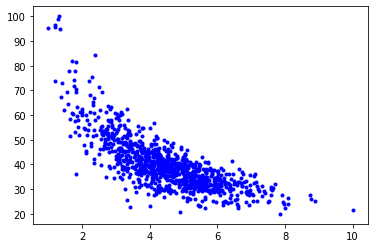

In [ ]:
plt.plot(X,y,'b.')

In [ ]:
df.shape

(1000, 2)

In [ ]:
from sklearn.linear_model import LinearRegression   #Importamos la Libreria de Regresion Linear
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import make_moons, make_circles
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




Divide los datos del costo de manufactura. Utiliza la función train_test_split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 


In [ ]:
print("number of test samples :", X_test.shape[0])   # datos de validacion 
print("number of training samples:",X_train.shape[0]) # datos de entrenamiento

number of test samples : 200
number of training samples: 800


**Regresion Lineal**

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [ ]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
Ecuacion(linear_reg)

[array([-6.04244726]), 67.01306355970974]

La Ecuación del modelo Regresion Lineal es:

YHAT= 67.013 - 6X

In [ ]:
#X_fit[]

In [ ]:
yhat_train= linear_reg.predict(X_train)    # Entranamiento
linear_reg.coef_, lin_reg.intercept_
yhat_train[0:5]



array([42.27469513, 18.14577724, 21.58213624, 53.6059232 , 39.70912337])

In [ ]:
yhat_test= linear_reg.predict(X_test)    # Validacion
linear_reg.coef_, lin_reg.intercept_
yhat_test[0:5]

array([40.05404245, 33.06599845, 41.12090752, 42.53162021, 45.54729144])

**Visualización**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


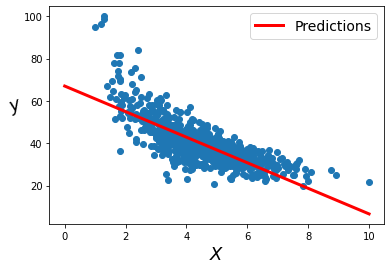

In [ ]:
X_fit = np.linspace(0, 10, 200)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=3, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=20, fontsize=18)
plt.legend(loc="upper right", fontsize=14);




Calculo de  errores y r cuadrada.

In [ ]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yhat_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhat_test)))
print('r2_score: ',r2_score(y_test, yhat_test))

Error medio Absoluto (MAE): 5.1019416976357705
Root Mean Squared Error: 7.155779808745889
r2_score:  0.5610235000809491


**Polinomial**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 


In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)


In [ ]:
X_poly

array([[ 4.09409754, 16.76163463],
       [ 8.08733353, 65.40496364],
       [ 7.51863035, 56.52980228],
       ...,
       [ 6.19656611, 38.39743161],
       [ 3.4889104 , 12.17249581],
       [ 2.06492056,  4.26389691]])

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)
lin_reg.coef_, lin_reg.intercept_

(array([-16.50723558,   1.13583147]), 89.08376006195618)

In [ ]:
Ecuacion(lin_reg)

[array([-16.50723558,   1.13583147]), 89.08376006195618]

La ecuacion es  yhat= -16.50X + 1.13X(Cuadrado) +  89.083

**Visualización**

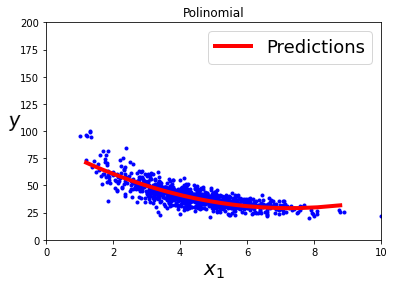

In [ ]:
X_poly = poly_features.fit_transform(X_test)
y_predict = lin_reg.predict(X_poly)

ordered = np.argsort(X_test.values.ravel())

x_fit_poly = X_test.values.ravel()[ordered]
y_fit_poly = y_test.values.ravel()[ordered]
fit_predPoly = y_predict[ordered]


plt.plot(X, y, "b.")
plt.plot(x_fit_poly, fit_predPoly, "r-", linewidth=4, label="Predictions")
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$y$", rotation=5, fontsize=20)
plt.legend(loc="upper right", fontsize=18)
plt.title("Polinomial")
plt.axis([0, 10, 0, 200]);

In [ ]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_fit_poly, fit_predPoly))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_fit_poly, fit_predPoly)))
print('r2_score: ',r2_score(y_fit_poly, fit_predPoly))

Error medio Absoluto (MAE): 4.681389755325274
Root Mean Squared Error: 6.199743070239553
r2_score:  0.6704853571719696


**Regresión con Ridge y Lasso**

**Modelo Ridge**

In [ ]:
modelo_Ridge = Ridge(alpha= 1)
modelo_Ridge.fit(X_train, y_train)
modelo_Ridge.coef_, lin_reg.intercept_

(array([-6.03819131]), 89.08376006195618)

In [ ]:
y_hat = modelo_Ridge.predict(X_test)

ordered = np.argsort(X_test.values.ravel())

X_Ridge = X_test.values.ravel()[ordered]
Y_Ridge = y_test.values.ravel()[ordered]
Z_predictRidge = y_hat[ordered]


In [ ]:
Ecuacion(modelo_Ridge)

[array([-6.03819131]), 66.99400595374111]

La ecuacion es  Y=  66.99 - 6.03X

(0.0, 10.0, 0.0, 200.0)

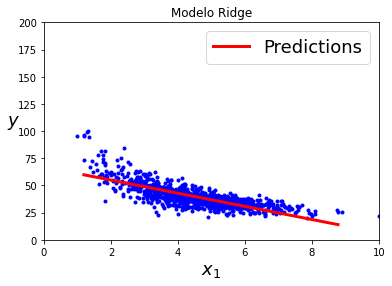

In [ ]:
plt.plot(X, y, "b.")
plt.plot(X_Ridge, Z_predictRidge, "r-", linewidth=3, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=18)
plt.title("Modelo Ridge")
plt.axis([0, 10, 0, 200])

In [ ]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(Y_Ridge, Z_predictRidge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_Ridge, Z_predictRidge)))
print('r2_score: ',r2_score(Y_Ridge, Z_predictRidge))

Error medio Absoluto (MAE): 5.1014179146653795
Root Mean Squared Error: 7.155734963239849
r2_score:  0.5610290022238651


**Modelo Lasso**

In [ ]:
mod_Lasso = Lasso(alpha = 1)
mod_Lasso.fit(X_train, y_train)
mod_Lasso.coef_, lin_reg.intercept_

(array([-5.47857595]), 89.08376006195618)

Ecuacion(modelo_Lasso)    Y= 89.083 - 5.478 X

In [ ]:
y_hat = mod_Lasso.predict(X_test)
ordered = np.argsort(X_test.values.ravel())
X_Lasso = X_test.values.ravel()[ordered]
Y_Lasso = y_test.values.ravel()[ordered]
Z_predictLasso = y_hat[ordered]

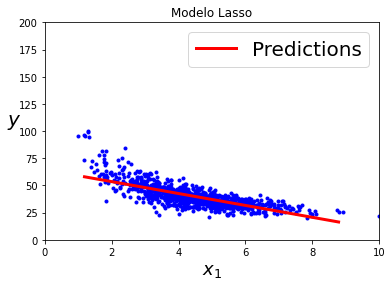

In [ ]:
plt.plot(X, y, "b.")
plt.plot(X_Lasso, Z_predictLasso, "r-", linewidth=3, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=20)
plt.legend(loc="upper right", fontsize=20)
plt.title("Modelo Lasso")
plt.axis([0, 10, 0, 200]);

In [ ]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(Y_Lasso, Z_predictLasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_Lasso, Z_predictLasso)))
print('r2_score: ',r2_score(Y_Lasso, Z_predictLasso))

Error medio Absoluto (MAE): 5.0546126012697385
Root Mean Squared Error: 7.189997196874955
r2_score:  0.5568152817241707


**Grafica MAE (de los cuatro métodos)**

/usr/local/lib/python3.7/dist-packages/numpy/lib/stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


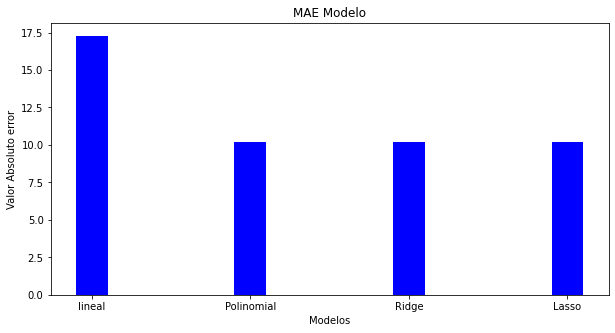

-----Resultados MAE Valor Absoluto-----
{'lineal': [17.2748546378366], 'Polinomial': 10.220611558035838, 'Ridge': [10.220611558035838], 'Lasso': 10.220611558035838}
---------------------


In [ ]:
# Creamos una base de datos con los modelos que generamos Teniendo como referencia los resultados vs los datos de Prueba.
data_MAE = {'lineal': [metrics.mean_absolute_error(y_test, y_fit)], 
        'Polinomial': metrics.mean_absolute_error(y_predict, y_fit_poly),
        'Ridge': [metrics.mean_absolute_error(y_predict, Y_Ridge)],
        'Lasso': metrics.mean_absolute_error(y_predict, Y_Lasso)}

errores_MAE = list(data_MAE.keys())
values_MAE = list(data_MAE.values())
fig = plt.figure(figsize = (10, 5))
 

plt.bar(errores_MAE, values_MAE, color = 'blue', width = 0.2)

plt.xlabel("Modelos")
plt.ylabel("Valor Absoluto error")
plt.title("MAE Modelo")
plt.show()

print("-----Resultados MAE Valor Absoluto-----")
print(data_MAE)
print("---------------------")

**R2 (de los cuatro métodos)**

----Resultados R2----
{'lineal': 20.917912452679314, 'Polinomial': 14.186057169928308, 'Ridge': 14.186057169928308, 'Lasso': 14.186057169928308}
---------------------


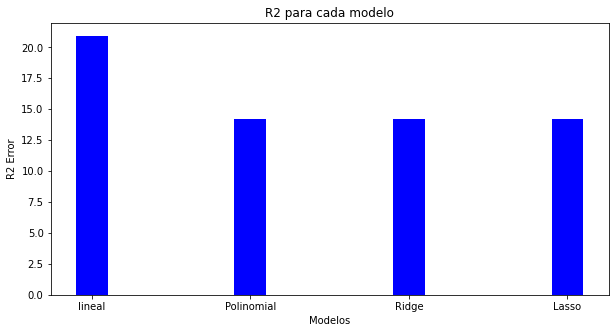

In [ ]:
data_r2 = {'lineal':  np.sqrt(metrics.mean_squared_error(y_test, y_fit)), 
        'Polinomial':  np.sqrt(metrics.mean_squared_error(y_predict, y_fit_poly)),
        'Ridge': np.sqrt(metrics.mean_squared_error(y_predict, Y_Ridge)),
        'Lasso':  np.sqrt(metrics.mean_squared_error(y_predict, Y_Lasso))}

errores_r2 = list(data_r2.keys())
values_r2 = list(data_r2.values())
fig = plt.figure(figsize = (10, 5))

plt.bar(errores_r2, values_r2, color ='blue', width = 0.2)

print("----Resultados R2----")
print(data_r2)
print("---------------------")

#Visualizamos el bar plot
plt.xlabel("Modelos")
plt.ylabel("R2 Error")
plt.title("R2 para cada modelo")
plt.show()

Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?

* Se realiza el ejercicio con el 80% de los datos de entrenamiento y el 20% de validación.

* El mejor metodo a utilizar segun las graficas y la ubicación en sus datos es el polynomial, sin embargo cuando aumentan los datos se puede llegar a observar un sobreentrenamiento algo que no es bueno.

*El metodo regresion lineal presenta buen desempeño, se observa una buena franja entre los datos y esta linea que representa la predicción. No se tendria un sobreentrenamiento.

* Se observa que el mejor resultado en MAE del valor absoluto del error esta representado por el modelo linear. al igual que la Raiz cuadrada.

En el caso del MAE, se obtuvo un error del 4.5. Mientras que para el R2, se obtuvo un error del 0.5. Ambos errores fueron buenos, entre más cerca está del 0, mejor son las predicciones.

* el modelo que presenta el mejor error es el polinomial con un valor de 6.19



#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


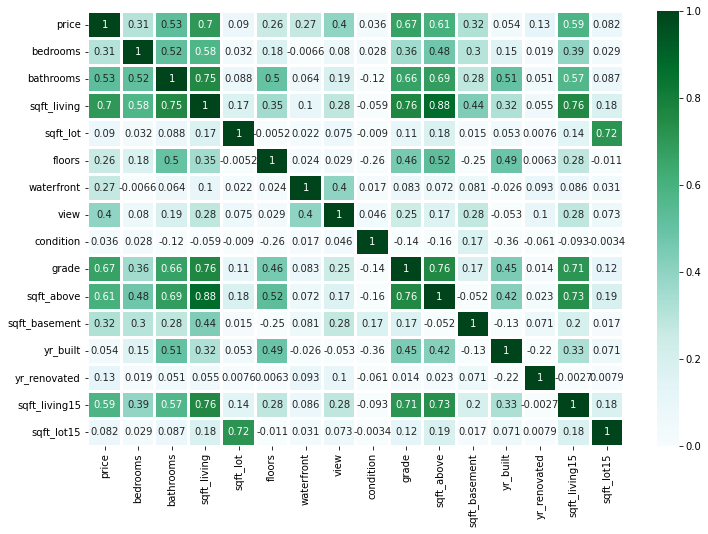

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='BuGn', linewidths = 2, vmin=0, vmax=1)
plt.show()
#sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)


In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [ ]:
print("number of test samples :", X_test.shape[0])   # datos de validacion 
print("number of training samples:",X_train.shape[0]) # datos de entrenamiento

number of test samples : 2162
number of training samples: 19451


**Regresion Multiple Lineal**

In [ ]:
Mul_linear_reg = LinearRegression(fit_intercept=True)    # Definimos el modelo Multiple Linear Regresion

Mul_linear_reg.fit(X_train, y_train)
y_pred = Mul_linear_reg.predict(X_test)
Mul_linear_reg.coef_,lin_reg.intercept_


(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 89.08376006195618)

In [ ]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score: ',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score:  0.6579723205007814


In [ ]:
MAE_lineal = metrics.mean_absolute_error(y_test, y_pred)
R2_lineal = metrics.r2_score(y_test, y_pred)
print(MAE_lineal, R2_lineal)

137480.1388273178 0.6579723205007814


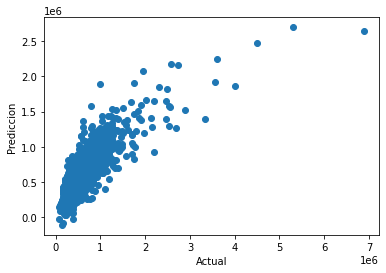

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Prediccion');

**Regresion Multiple Polinomial**

In [ ]:
poly_Mul = PolynomialFeatures(degree=2, include_bias=False)
X_poly_Mul_Train = poly_Mul.fit_transform(X_train)

lin_reg_mul = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly_Mul_Train, y_train)
lin_reg.coef_, lin_reg.intercept_

X_poly_test = poly_Mul.fit_transform(X_test)
y_pred_poly = lin_reg.predict(X_poly_test)

lin_reg.coef_, lin_reg.intercept_

(array([[ 9.33912834e+05, -1.09330730e+06, -4.56449932e+02,
         -2.78686288e+01, -2.07407238e+06, -3.95431870e+06,
         -2.88638026e+05,  5.58697570e+05,  1.09864510e+06,
         -2.19758415e+02, -3.82034272e+02, -8.59630908e+04,
         -2.95351595e+03,  3.99965710e+03, -3.40106316e+01,
          9.57541696e+02,  7.49958190e+03, -1.37969466e+01,
         -1.84926695e-02,  8.57699569e+03, -1.14965893e+04,
         -3.06588900e+02, -5.24628836e+03, -5.36788065e+03,
         -1.20757669e+00, -1.46068182e+01, -4.67099451e+02,
         -9.13191519e+00,  1.72800642e+01,  2.15500198e-01,
         -9.63429892e+03,  1.53879172e+01, -1.35842369e-01,
         -2.59067293e+04,  4.33707238e+04,  3.82942459e+03,
         -1.07592927e+03,  2.22971689e+04,  1.44292325e+01,
          1.33928361e+00,  5.03401980e+02, -1.70798805e+01,
         -1.72895923e+01, -5.56785248e-02,  1.56185890e+00,
         -4.34972758e+00,  4.83299456e+00,  1.60303193e+02,
         -1.42711737e+01,  1.31138593e+0

In [ ]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score: ',r2_score(y_test, y_pred_poly))

Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score:  0.7797929072570198


In [ ]:
MAE_lineal = metrics.mean_absolute_error(y_test, y_pred_poly)
R2_lineal = metrics.r2_score(y_test, y_pred_poly)
print(MAE_lineal, R2_lineal)

121314.06948173394 0.7797929072570198


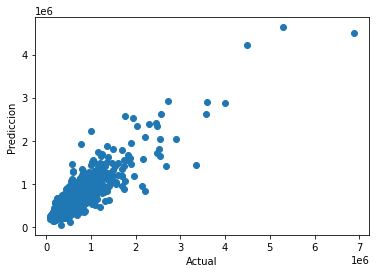

In [ ]:
plt.scatter(y_test,y_pred_poly);
plt.xlabel('Actual');
plt.ylabel('Prediccion');

**Regresion con Modelo Ridge**

In [ ]:
modeloRidge2 = Ridge(alpha = 1)
modeloRidge2.fit(X_train, y_train)
modeloRidge2.coef_, lin_reg.intercept_
y_hat2 = modeloRidge2.predict(X_test)


In [ ]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_hat2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat2)))
print('r2_score: ',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 137491.0433940327
Root Mean Squared Error: 232165.2426647754
r2_score:  0.6579723205007814


In [ ]:
MAE_lineal = metrics.mean_absolute_error(y_test, y_hat2)
R2_lineal = metrics.r2_score(y_test, y_hat2)
print(MAE_lineal, R2_lineal)

137491.0433940327 0.6578783840295006


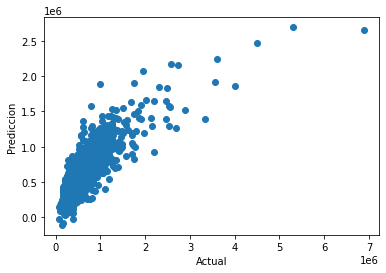

In [ ]:
plt.scatter(y_test,y_hat2);
plt.xlabel('Actual');
plt.ylabel('Prediccion');

**Regresion con Modelo Lasso**

In [ ]:
mod_Lasso2 = Lasso(alpha = 1)
mod_Lasso2.fit(X_train, y_train)
mod_Lasso2.coef_, lin_reg.intercept_


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


(array([-3.81995345e+04,  4.14618568e+04,  2.93480482e+02,  1.71281822e-02,
         3.16871411e+04,  5.52541108e+05,  4.12549654e+04,  2.12193902e+04,
         1.19491837e+05, -1.37708200e+02, -1.25268449e+02, -3.55085005e+03,
         1.32628460e+01,  2.90053298e+01, -5.48136075e-01]),
 array([80227028.3104757]))

In [ ]:
y_lasso2 = mod_Lasso2.predict(X_test)

In [ ]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_lasso2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_lasso2)))
print('r2_score: ',r2_score(y_test, y_lasso2))

Error medio Absoluto (MAE): 137480.57154885164
Root Mean Squared Error: 232134.527538022
r2_score:  0.6579689024340813


In [ ]:
MAE_lineal = metrics.mean_absolute_error(y_test, y_lasso2)
R2_lineal = metrics.r2_score(y_test, y_lasso2)
print(MAE_lineal, R2_lineal)

137480.57154885164 0.6579689024340813


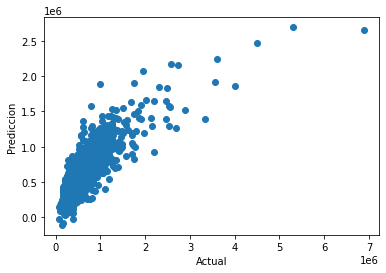

In [ ]:
plt.scatter(y_test,y_hat2);
plt.xlabel('Actual');
plt.ylabel('Prediccion');

**Grafica MAE (de los cuatro métodos)**

/usr/local/lib/python3.7/dist-packages/numpy/lib/stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


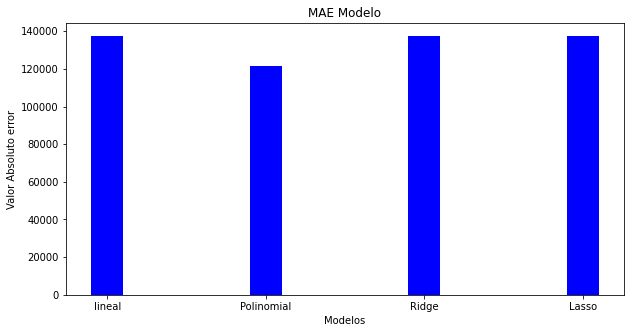

-----Resultados MAE Valor Absoluto-----
{'lineal': [137480.1388273178], 'Polinomial': 121314.06948173394, 'Ridge': [137491.0433940327], 'Lasso': 137480.57154885164}
---------------------


In [ ]:
# Creamos una base de datos con los modelos que generamos Teniendo como referencia los resultados vs los datos de Prueba.
data_MAE = {'lineal': [metrics.mean_absolute_error(y_test, y_pred)], 
        'Polinomial': metrics.mean_absolute_error(y_test, y_pred_poly),
        'Ridge': [metrics.mean_absolute_error(y_test, y_hat2)],
        'Lasso': metrics.mean_absolute_error(y_test, y_lasso2)}

errores_MAE = list(data_MAE.keys())
values_MAE = list(data_MAE.values())
fig = plt.figure(figsize = (10, 5))
 

plt.bar(errores_MAE, values_MAE, color = 'blue', width = 0.2)

plt.xlabel("Modelos")
plt.ylabel("Valor Absoluto error")
plt.title("MAE Modelo")
plt.show()

print("-----Resultados MAE Valor Absoluto-----")
print(data_MAE)
print("---------------------")

**R2 de los Cuatro modelos**

----Resultados R2----
{'lineal': 232133.3676240749, 'Polinomial': 186261.28575138954, 'Ridge': 232165.2426647754, 'Lasso': 232134.527538022}
---------------------


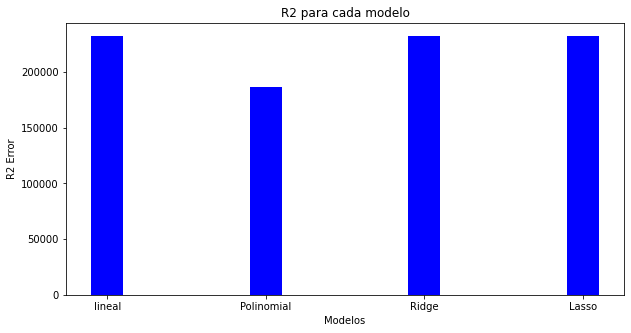

In [ ]:
data_r2 = {'lineal':  np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 
        'Polinomial':  np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)),
        'Ridge': np.sqrt(metrics.mean_squared_error(y_test, y_hat2)),
        'Lasso':  np.sqrt(metrics.mean_squared_error(y_test, y_lasso2))}

errores_r2 = list(data_r2.keys())
values_r2 = list(data_r2.values())
fig = plt.figure(figsize = (10, 5))

plt.bar(errores_r2, values_r2, color ='blue', width = 0.2)

print("----Resultados R2----")
print(data_r2)
print("---------------------")

#Visualizamos el bar plot
plt.xlabel("Modelos")
plt.ylabel("R2 Error")
plt.title("R2 para cada modelo")
plt.show()

Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?

* En este Ejercicio se tiene  2162 datos de validacion y 19451 de entrenamiento. Se utilizo el 10 % de datos de validacion. y el 90% de entrenamiento.

* En la grafica MAE se observa un buen rendimiento de linear, ridge y lasso, Pero como mejor ridge teniendo valor en MAE de 13791

* Se observa que los errores obtenidos son iguales en linear, ridge y lasso con un valor de 0.65 y  polinomial un valor de 0,77, es  bueno tener un valor cercano a 0.

**Conclusiones**

*Por medio de la grafica  de calor En el ejercicio 2 podemos observar correlacion entre algunas variables, la mayor correlacion fue con un puntaje de 0.88 para laas sigueintes variables sqft_living-sqft_above.

*El ejercicio nos permitio conocer a detalle las funciones linear, polinomial , lasso y ridge. Se puede observar los comportamientos de las funciones basandonos en conjuntos de entrenamiento y conjuntos de validacion.

*Se observa la funcion polinomial se ajusta de una mejor manera a los datos , se debe tener en cuenta que debe haber una franja entre la funcion y datos con el objetivo de evitar el sobre entrenamiento.

*Se realizo una particion de los datos , en el primer ejercicio 80% de entrenamiento y 20 % de prueba y en el segundo ejercicio 90% de entrenamiento y 10% de prueba . Estas particiones permiten tener un equilibrio entre el sesgo y la varianza, debido a que si se cuenta con la totalidad de datos en el conjunto de entrenamiento va aumentar el sesgo teniendo una predicción del 100%  y no seria algo asertivo.

*El porcentaje de error depende del negocio o de la aplicación que se este realizando del ejercicio, que tan dispuestos estamos para asumir el error y la afectacion del mismo.

*Se sugiere realizar un escalamiento y un ajuste de los datos por medio de alguna funcion ejemplo logartimo, raiz cuadrada etc.  Con el objetivo de identificar valores atipicos.
